<a href="https://colab.research.google.com/github/petercloud23/Equipe_DataScience_SENAI_Out25/blob/main/dataScience3_Searborn_MPlot3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados carregados:
       Nome  Idade          Cidade
0      Ana     30       São Paulo
1   Carlos     25  Rio de Janeiro
2  Beatriz     28  Belo Horizonte

Idade média: 27.666666666666668





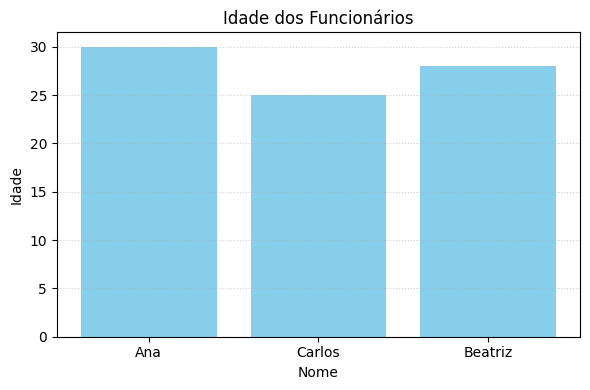

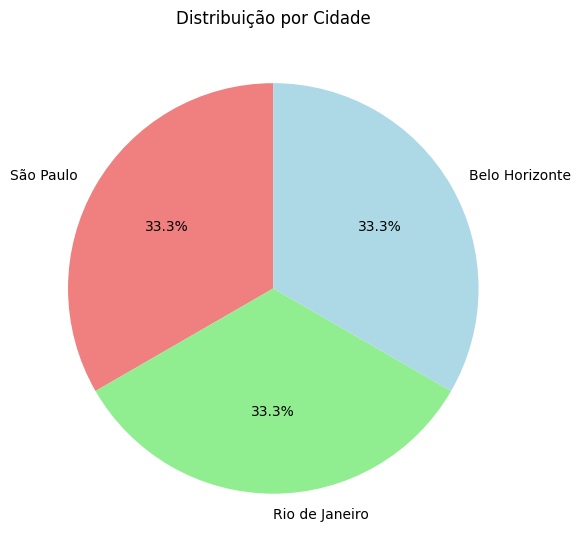

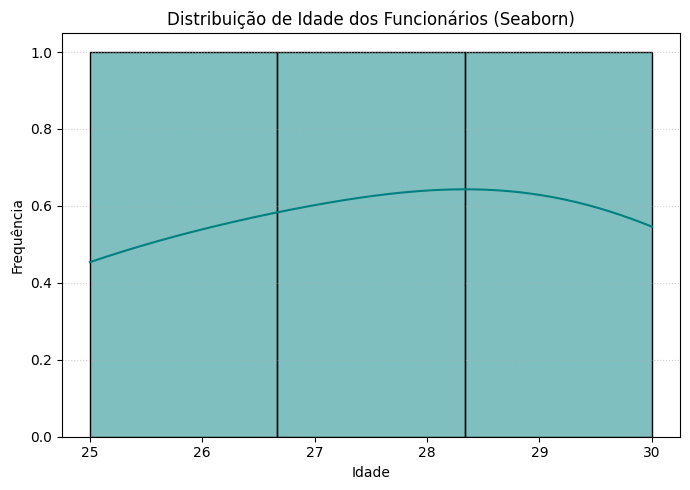

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ler o CSV real
df = pd.read_csv("/content/exemplo.csv")

# Mostrar o DataFrame
print("Dados carregados:\n", df)

# Estatística simples: idade média
print("\nIdade média:", df["Idade"].mean())

print("\n" * 2) # Adiciona espaço em branco para separar os gráficos
# --- Gráfico 1: Barras com idades ---
fig1, ax1 = plt.subplots(figsize=(6,4)) # Cria uma nova figura e um conjunto de eixos
ax1.bar(df["Nome"], df["Idade"], color="skyblue")
ax1.set_title("Idade dos Funcionários")
ax1.set_xlabel("Nome")
ax1.set_ylabel("Idade")
ax1.grid(axis="y", linestyle=":", alpha=0.6)
fig1.tight_layout() # Aplica layout apertado à figura
fig1.savefig("/content/idades_funcionarios.png", dpi=150)  # SALVAR
plt.show()
plt.close(fig1) # Fecha explicitamente a figura 1 para evitar sobreposição

print("\n" * 2) # Adiciona espaço em branco para separar os gráficos
# --- Gráfico 2: Pizza com distribuição por cidade ---
fig2, ax2 = plt.subplots(figsize=(6,6)) # Cria uma nova figura e um conjunto de eixos
df["Cidade"].value_counts().plot.pie(
    ax=ax2, # Plota no eixo criado
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightcoral","lightgreen","lightblue"]
)
ax2.set_ylabel("")  # remove o label lateral
ax2.set_title("Distribuição por Cidade")
fig2.tight_layout() # Aplica layout apertado à figura
fig2.savefig("/content/distribuicao_cidade.png", dpi=150)  # SALVAR
plt.show()
plt.close(fig2) # Fecha explicitamente a figura 2 para evitar sobreposição

print("\n" * 2) # Adiciona espaço em branco para separar os gráficos


# --- Gráfico 3: Histograma com idades usando Seaborn (NOVA ADIÇÃO) ---
fig3, ax3 = plt.subplots(figsize=(7,5)) # Cria uma nova figura e um conjunto de eixos
# sns.histplot cria um histograma. df["Idade"] é a coluna a ser plotada.
# kde=True adiciona uma estimativa de densidade de kernel (linha suave) ao histograma.
# color="teal" define a cor das barras.
# bins=3 especifica o número de caixas (intervalos) para agrupar os dados de idade.
sns.histplot(df["Idade"], kde=True, color="teal", bins=3, ax=ax3) # Plota no eixo criado
ax3.set_title("Distribuição de Idade dos Funcionários (Seaborn)")
ax3.set_xlabel("Idade")
ax3.set_ylabel("Frequência")
ax3.grid(axis="y", linestyle=":", alpha=0.6)
fig3.tight_layout() # Aplica layout apertado à figura
fig3.savefig("/content/histograma_idades.png", dpi=150) # SALVAR
plt.show()
plt.close(fig3) # Fecha explicitamente a figura 3 para evitar sobreposição


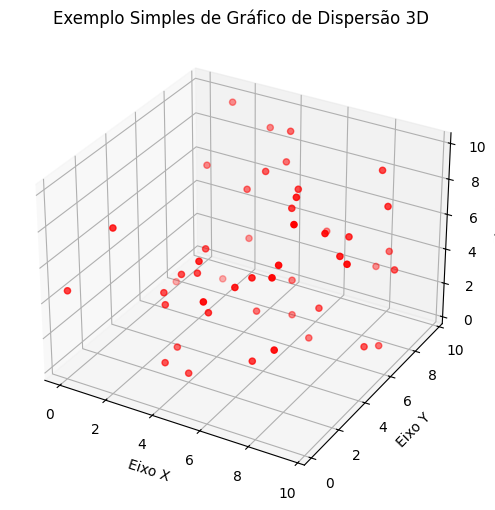

In [7]:
import matplotlib.pyplot as plt
import random

# Importa o toolkit 3D para Matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Cria uma nova figura e um conjunto de eixos 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Gerando dados aleatórios para o exemplo
x_data = [random.uniform(0, 10) for _ in range(50)]
y_data = [random.uniform(0, 10) for _ in range(50)]
z_data = [random.uniform(0, 10) for _ in range(50)]

# Plotando os pontos 3D
ax.scatter(x_data, y_data, z_data, c='red', marker='o')

# Definindo rótulos para os eixos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')

# Definindo o título do gráfico
ax.set_title('Exemplo Simples de Gráfico de Dispersão 3D')

plt.show()
plt.close(fig) # Fecha a figura para evitar sobreposição

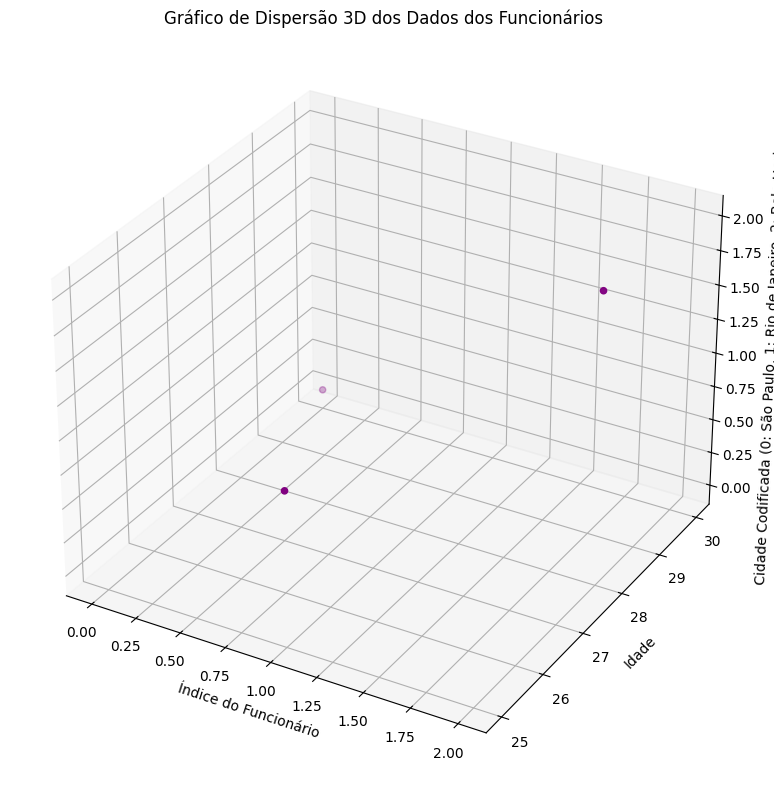

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Certifique-se de que o DataFrame 'df' está disponível no escopo
# Se não estiver, você precisaria carregá-lo novamente, por exemplo:
# df = pd.read_csv("/content/exemplo.csv")

# Criar uma representação numérica para a coluna 'Cidade' e obter o mapeamento
# pd.factorize retorna um array de inteiros para cada categoria única e o array das categorias únicas.
encoded_cities, unique_cities = pd.factorize(df['Cidade'])
df['Cidade_Codificada'] = encoded_cities

# Preparar os dados para o gráfico 3D
x_data = df.index.values        # Usando o índice do DataFrame como eixo X
y_data = df['Idade'].values     # Usando a coluna 'Idade' como eixo Y
z_data = df['Cidade_Codificada'].values # Usando a 'Cidade_Codificada' como eixo Z

# Criar uma nova figura e um conjunto de eixos 3D
fig = plt.figure(figsize=(10, 8)) # Aumentei o tamanho da figura para melhorar o espaçamento
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos 3D
# Usando a coluna 'Nome' para colorir os pontos (opcional, para visualização)
# Para um exemplo simples, usaremos uma cor única
ax.scatter(x_data, y_data, z_data, c='purple', marker='o')

# Definir rótulos para os eixos
ax.set_xlabel('Índice do Funcionário')
ax.set_ylabel('Idade')

# Construir o rótulo do eixo Z com o mapeamento das cidades
cidade_mapping = ', '.join([f"{i}: {city}" for i, city in enumerate(unique_cities)])
ax.set_zlabel(f'Cidade Codificada ({cidade_mapping})')

# Definir o título do gráfico
ax.set_title('Gráfico de Dispersão 3D dos Dados dos Funcionários')

fig.tight_layout() # Adicionado para ajustar automaticamente o layout e evitar sobreposição de rótulos
plt.show()
plt.close(fig) # Fechar a figura para evitar sobreposição
